## Table of Contents
#### 01. Importing Libraries and Data
#### 02. Question 2 - Scurity implications
#### 03. Question 3 - Comparing behavior in geographic areas
#### 04. Question 4 - Exlusion flags
#### 05. Question 5 - Customer profiles
#### 06. Creating a new data frame for statistical analysis
#### 07. Question 6 - Visualizations on profiles
#### 08. Question 7 - Aggreagations (min,max,mode,median)
#### 09. Question 8 - Crosstabs (Region/Department by Profiles)
#### 10. Question 9 -  Visualizations on our findings
#### 11. Exporting

## 01. Importing Libraries and Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing Data
path = r'C:\Users\javir\Downloads\Javis Data Analytics stuff\Achievement 4\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'cust_combined.pkl'))

## 02. Question 2 - Consider any security implications for this new data, address any PII

We the addition of the Customer related info, we now have their First and Last name attached to user_id so anyone malicious enough could track customers ordering, we also are provided with sensative information such as: Income, Martial Status, State of home address, gender/sex, etc. This information would be considered PII (personally identifiable information), however, this information was fabricated for the purpose of education, so this information does not tie to any individuals that may exist and we can disregard it.

## 03. Question 3 - Comparing customer behavior in different geographic areas.

We will need to create a region column based off the state column

We will create lists based off the regions and will will the list with values of those states for the region

In [3]:
north_east = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [4]:
mid_west = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [5]:
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [6]:
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

#### Now we wil use a for-loop to check state column and refrence the lists we made and return values for the region

In [7]:
region = []

for value in df["state"]:
  if value in north_east:
    region.append('North East')
  elif value in mid_west:
    region.append('Mid West')
  elif value in south:
    region.append('South')
  elif value in west:
    region.append('West')
  else:
    region.append('NaN')

In [8]:
# Cheking to see if values successfully outputted
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [9]:
# Creating our region column and filling it with our new region list
df['region'] = region

In [10]:
# Checking value counts to ensure no NaN values have filled any rows
df['region'].value_counts()

South         10870719
West           8353182
Mid West       7652535
North East     5764832
Name: region, dtype: int64

In [11]:
# Creating a crosstab to check spending habits between the regions
region_spend = pd.crosstab(df['region'],df['spender_flag'])

In [12]:
# Now we can check spending habits of all regions
region_spend

spender_flag,High spender,Low spender
region,,
Mid West,157347,7495188
North East,109140,5655692
South,211679,10659040
West,161834,8191348


We are able to see that the South has the highest count of high-spending customers as well as low-spending customers, this seems largely due to, through simple calculations, having the largest customer base

In [13]:
df.groupby(['region']).agg({'order_number':['sum']})

,order_number
,sum
region,
Mid West,129497046
North East,99222910
South,186397284
West,144303856


The south have fourty million more orders than the next highest region

In [14]:
df.groupby(['region']).agg({'prices':['mean']})

,prices
,mean
region,
Mid West,12.715483
North East,11.554997
South,12.195577
West,11.319834


Despite the much larger order numbers and customer count, the Mid West has a higher average price per order

## 04. Question 4 - CFO wants an exclusion flag for customers with less than 5 orders and to exclude them from our data

We will create a new column for exclusion flags based on max_order

In [15]:
# Creating our list that will fill our column
exclusion = []

for value in df['max_order']:
  if value <= 5:
    exclusion.append('Low')
  else:
    exclusion.append('Norm')

In [16]:
# Creating our column
df['exclusion'] = exclusion

In [17]:
# Checking our value counts
df['exclusion'].value_counts()

Norm    31156122
Low      1485146
Name: exclusion, dtype: int64

#### Now we have to exclude those rows that include low activity customers

In [18]:
# Checking our row count before we drop rows
df.shape

(32641268, 37)

In [19]:
# Creating an index of the rows we want to remove from our data
ex_index = df[df['exclusion'] == 'Low'].index

In [20]:
# Creating a second dataframe with those rows removed
df.drop(ex_index, inplace = True)

In [21]:
# Checkign our row count after drop to confirm
df.shape

(31156122, 37)

Now that we have removed the rows with our low activity customers, we will remove the column we made as to not have a column that only includes 1 value in the data frame

In [22]:
# Dropping column to reduce unnecessary columns
df_2 = df.drop(columns = ['exclusion'])

## 05. Question 5 - Creating customer profiles to categorize the customer base

#### We will be creating 3 main categories of customers
#### 1. Parent Category 'num_of_dependants'
#### 1.1 New parent category 'department_id', sub category we can pair with our Parent Category to better market
#### 2. Pet Owner Category 'department_id'
#### 3. Income Level Category 'income'

### 05.1. Parent Category

In [23]:
df_2['num_of_dependants'].value_counts()

3    7820251
0    7787911
2    7781142
1    7766818
Name: num_of_dependants, dtype: int64

In [24]:
# Creating list to fill our new column
parent = []

for value in df_2['num_of_dependants']:
  if value == 0:
    parent.append('No current dependants')
  elif value == 1:
    parent.append('Parent of one')
  else:
    parent.append('Parent of two or more')


In [25]:
df_2['parent_category'] = parent

In [26]:
# Checking values
df_2['parent_category'].value_counts()

Parent of two or more    15601393
No current dependants     7787911
Parent of one             7766818
Name: parent_category, dtype: int64

In [27]:
# Creating dataframe to then chart
df_parent = df_2.groupby('parent_category').agg({'user_id':['nunique']})

### 05.1.1. Baby Shopper Category

In [28]:
# Creating a flag for if customer orders from baby department(18)
df_2['baby_order_flag'] = ''

In [29]:
# If the order has an department_id of 18, it is given a 1
df_2.loc[(df_2['department_id'] == 18), 'baby_order_flag'] = 1

In [30]:
# If the order is not from department_id 18, it is given a 0
df_2.loc[(df_2['department_id'] != 18), 'baby_order_flag'] = 0

In [31]:
df_baby_flag = df_2.groupby('user_id').agg({'baby_order_flag' : 'sum'})

In [32]:
# Creating a column to define baby_shopper's
df_baby_flag['baby_shopper'] = ''

In [33]:
# Any orders with a baby_order_flag of 1, identifies the customer as a pet_shopper
df_baby_flag.loc[(df_baby_flag['baby_order_flag'] >= 1), 'baby_shopper'] = 'Baby Shopper'

In [34]:
# Any orders without a 1 and instead a 0, are seen as None Pet Shoppers
df_baby_flag.loc[(df_baby_flag['baby_order_flag'] == 0), 'baby_shopper'] = "None Baby Shopper"

In [35]:
df_baby_flag['baby_shopper'].value_counts()

None Baby Shopper    132403
Baby Shopper          30230
Name: baby_shopper, dtype: int64

In [36]:
#Removing flag column as no longer needed
df_baby_flag = df_baby_flag.drop(columns = ['baby_order_flag'])

In [37]:
# Merging the data we just created to our original data set
df_merg = df_2.merge(df_baby_flag, on = 'user_id', how = 'left')

In [38]:
# Creating dataframe to then chart
df_baby = df_merg.groupby('baby_shopper').agg({'user_id':['nunique']})

### 05.2. Pet Shopper Category

In [39]:
# Creating a flag for if customer orders from pet department(8)
df_merg['pet_order_flag'] = ''

In [40]:
# If the order has an department_id of 8, it is given a 1
df_merg.loc[(df_merg['department_id'] == 8), 'pet_order_flag'] = 1

In [41]:
# If the order is not from department_id 8, it is given a 0
df_merg.loc[(df_merg['department_id'] != 8), 'pet_order_flag'] = 0

In [42]:
df_pet_flag = df_merg.groupby('user_id').agg({'pet_order_flag' : 'sum'})

In [43]:
# Creating a column to define pet_shopper's
df_pet_flag['pet_shopper'] = ''

In [44]:
# Any orders with a pet_order_flag of 1, identifies the customer as a pet_shopper
df_pet_flag.loc[(df_pet_flag['pet_order_flag'] >= 1), 'pet_shopper'] = "Pet Shopper"

In [45]:
# Any orders without a 1 and instead a 0, are seen as None Pet Shoppers
df_pet_flag.loc[(df_pet_flag['pet_order_flag'] == 0), 'pet_shopper'] = "Non Pet Shopper"

In [46]:
df_pet_flag['pet_shopper'].value_counts()

Non Pet Shopper    149458
Pet Shopper         13175
Name: pet_shopper, dtype: int64

In [47]:
#Removing flag column as no longer needed
df_pet_flag = df_pet_flag.drop(columns = ['pet_order_flag'])

#### Creating a data frame 'df_final' as our final .merge() function 

In [48]:
# Merging the data we just created to our original data set
df_final = df_merg.merge(df_pet_flag, on = 'user_id', how = 'left')

In [49]:
# Creating dataframe to then chart
df_pet = df_final.groupby('pet_shopper').agg({'user_id':['nunique']})

### 05.3. Income Level Category

In [50]:
# Creating list to fill our new column
income = []

for value in df_2['income']:
  if value < 40000:
    income.append('Low Income')
  elif value > 80000:
    income.append('High Income')
  elif value >= 40000 & value <= 80000:
    income.append('Moderate Income')
  else:
    income.append('NaN')

In [51]:
df_final['income_level'] = income

In [52]:
# Checking values
df_final['income_level'].value_counts()

High Income        20089246
Moderate Income     9440483
Low Income          1626393
Name: income_level, dtype: int64

In [53]:
# Creating dataframe to then chart
df_income = df_final.groupby('income_level').agg({'user_id':['nunique']})

## 06. Creating a new data frame for statistical analysis

Our current 'df_final' has more than 30 million rows of data, of all that data alot of the rows have multiple records of the same user because they have multiple orders and for each order we have a row for every product they've purchased, this creates several tens of rows of customer information for just 1 customer. This inflation of records will not accurately portray the information held in data for statistical analysis and needs to be delat with.

In [54]:
# Creating a data frame pulling only customer information for statistical analysis
cust = df_final[['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'region', 'family_status', 'num_of_dependants', 'parent_category', 'income', 'income_level', 'date_joined', 'order_frequency', 'frequency_flag', 'avg_spent', 'spender_flag', 'baby_shopper', 'pet_shopper']]

In [55]:
# Droping any duplicated rows
cust_clean = cust.drop_duplicates()

In [56]:
# Checking our data shape
cust_clean.shape

(162633, 19)

## 07. Question 6 - Create visualizations to show the distrbution of profiles

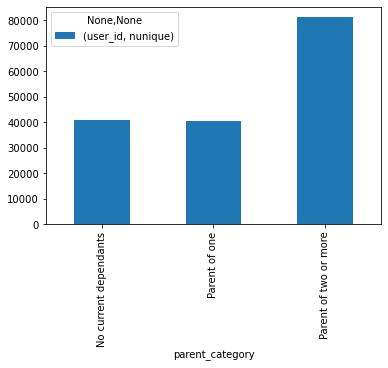

In [57]:
parent_bar = df_parent.plot.bar()

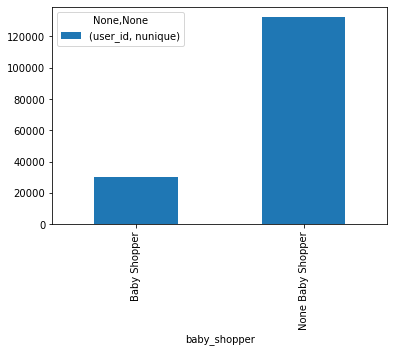

In [58]:
baby_bar = df_baby.plot.bar()

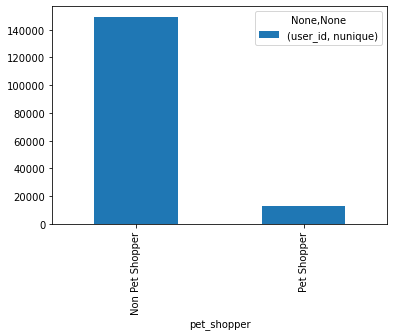

In [59]:
pet_bar = df_pet.plot.bar()

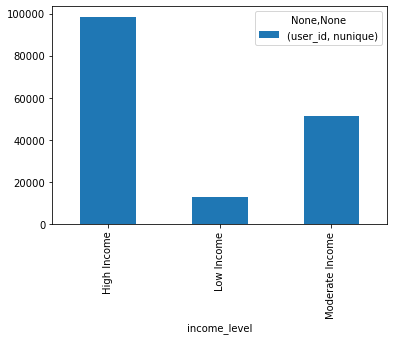

In [60]:
income_bar = df_income.plot.bar()

## 08. Question 7 - Aggregate the max, mean, and min for customer profiles

### 08.1. Parent Category

In [61]:
# Gatering 'age','orders_day_of_week','order_hour_of_day','order_frequency','prices' statistical data
cust_clean.groupby('parent_category').agg({'age':['max','min','mean','median']})

age                      
                      max min       mean median
parent_category                                
No current dependants  81  18  49.376792     49
Parent of one          81  18  49.568901     49
Parent of two or more  81  18  49.590401     50

Ages are fairly similar all around between the categories with only instant notable diffrence being median for 'Parent of two or more' being 50 rather than 49

In [62]:
cust_clean.groupby('parent_category').agg({'order_frequency':['max','min','mean','median']})

order_frequency                       
                                  max  min       mean median
parent_category                                             
No current dependants            30.0  0.0  13.795644   11.0
Parent of one                    30.0  0.0  13.819386   11.0
Parent of two or more            30.0  0.0  13.784771   11.0

Frequencies in orders between the categories is non-existant, the means are within 0.2 of each other

### 08.1.1 Baby Shopper Category

In [63]:
# Gatering 'age','order_frequency', statistical data
cust_clean.groupby('baby_shopper').agg({'age':['max','min','mean','median']})

age                      
                  max min       mean median
baby_shopper                               
Baby Shopper       81  18  49.610619     50
None Baby Shopper  81  18  49.513470     49

Ages are fairly similar all around between the categories with only instant notable diffrence being median for 'Baby Shopper' being 50 rather than 49

In [64]:
cust_clean.groupby('baby_shopper').agg({'order_frequency':['max','min','mean','median']})

order_frequency                       
                              max  min       mean median
baby_shopper                                            
Baby Shopper                 30.0  0.0  11.368740    9.0
None Baby Shopper            30.0  0.0  14.350377   12.0

Notable difference is that 'Baby Shopper' customers order more frequently than 'Non Baby Shopper' customers

### 08.2. Pet Owner Category

In [65]:
# Gatering 'age','order_frequency' statistical data
cust_clean.groupby('pet_shopper').agg({'age':['max','min','mean','median']})

age                      
                max min       mean median
pet_shopper                              
Non Pet Shopper  81  18  49.515088     49
Pet Shopper      81  18  49.718027     50

Ages are fairly similar all around between the categories with only instant notable diffrence being median for 'Pet Shopper' being 50 rather than 49

In [66]:
cust_clean.groupby('pet_shopper').agg({'order_frequency':['max','min','mean','median']})

order_frequency                       
                            max  min       mean median
pet_shopper                                           
Non Pet Shopper            30.0  0.0  13.916615   12.0
Pet Shopper                30.0  0.0  12.429639   10.0

Notable difference is that 'Pet Shopper' customers order slightly more frequently than 'Non Pet Shopper' customers

### 08.3. Income Level

In [67]:
# Gatering 'age','order_frequency' statistical data
cust_clean.groupby('income_level').agg({'age':['max','min','mean','median']})

age                      
                max min       mean median
income_level                             
High Income      81  18  55.434635     57
Low Income       81  18  45.485465     42
Moderate Income  81  18  39.227041     34

High income customers on average are older customers with moderate income customers being younger while low income customers are more in the middle.

In [68]:
cust_clean.groupby('income_level').agg({'order_frequency':['max','min','mean','median']})

order_frequency                       
                            max  min       mean median
income_level                                          
High Income                30.0  0.0  13.570825   11.0
Low Income                 30.0  0.0  14.970020   13.0
Moderate Income            30.0  0.0  13.939505   12.0

Order frequencies are similar but on average, low income customers order less with high income customers ordering the most

## 09. Question 8 - Compare customer profiles with regions and departments. Can you identify any links.

### 09.1. Parent Category Crosstabs

In [69]:
# Creating Crosstab
region_parent = pd.crosstab(df_final['region'],cust_clean['parent_category'])

In [70]:
region_parent

parent_category,No current dependants,Parent of one,Parent of two or more
region,,,
Mid West,9567,9635,19175
North East,7255,7185,14141
South,13537,13546,27111
West,10369,10323,20789


### Calculations
Total customers: 162,633
#### No Current Dependants: 40,728 : 25%
Mid-West: 23%   North East: 18%   South: 33%   West: 25%
#### Parent of One: 40,689 : 25%
Mid-West: 24%   North East: 17%   South: 33%   West: 25%
#### Parent of Two or More: 81,216 : 50%
Mid-West: 24%   North East: 17%   South: 33%   West: 26%

The South with its larger population is the leader in all categories, we also notice that the majority falls into having 2 dependants or more.

In [71]:
# Creating Crosstab
department_parent = pd.crosstab(df_final['department_id'],cust_clean['parent_category'])

In [72]:
department_parent

parent_category,No current dependants,Parent of one,Parent of two or more
department_id,,,
1.0,2663,2430,5083
2.0,78,71,120
3.0,1521,1517,3028
4.0,10955,11177,22032
5.0,526,593,1132
6.0,277,273,516
7.0,5235,5248,10643
8.0,183,185,313
9.0,652,622,1370


Most orders come from the Produce(4.0) department in all categories, with Dairy/Eggs(16) coming in second.

### 09.1.1. Baby Shopper Category Crosstabs

In [73]:
# Creating Crosstab
region_baby = pd.crosstab(df_final['region'],cust_clean['baby_shopper'])

In [74]:
region_baby

baby_shopper,Baby Shopper,None Baby Shopper
region,,
Mid West,7205,31172
North East,5325,23256
South,10053,44141
West,7647,33834


### Calculations
Total customers: 162,633
#### Baby Shopper: 30,230 : 19%
Mid-West: 24%   North East: 18%   South: 33%   West: 25%
#### None Baby Shopper: 132,403 : 81%
Mid-West: 23%   North East: 18%   South: 33%   West: 25%

South remains dominate due to largest size of customers, however, when we do the calculations, Baby Shoppers only make up 19 percent of the customer base

In [75]:
# Creating Crosstab
department_baby = pd.crosstab(df_final['department_id'],cust_clean['baby_shopper'])

In [76]:
department_baby

baby_shopper,Baby Shopper,None Baby Shopper
department_id,,
1.0,1762,8414
2.0,79,190
3.0,1323,4743
4.0,7710,36454
5.0,216,2035
6.0,166,900
7.0,3125,18001
8.0,107,574
9.0,503,2141


It becomes difficult to determine any patterns as 81% of customers are None Baby Shoppers, calculations would need to be done to get significant results. However Produce(4.0) department is still largely most common department, with Dairy/Eggs(16) coming in second.

### 09.2. Pet Shopper Crosstabs

In [77]:
# Creating Crosstab
region_pet = pd.crosstab(df_final['region'],cust_clean['pet_shopper'])

In [78]:
region_pet

pet_shopper,Non Pet Shopper,Pet Shopper
region,,
Mid West,35264,3113
North East,26282,2299
South,49869,4325
West,38043,3438


### Calculations
Total customers: 162,633
#### Pet Shopper: 13,175 : 9%
Mid-West: 24%   North East: 17%   South: 33%   West: 26%
#### None Pet Shopper: 149,458 : 91%
Mid-West: 24%   North East: 18%   South: 33%   West: 25%

Pet Shoppers make up only 9% of the customer base making it the second lowest count profile in our customer base that we have identified.

In [79]:
# Creating Crosstab
department_pet = pd.crosstab(df_final['department_id'],cust_clean['pet_shopper'])

In [80]:
department_pet

pet_shopper,Non Pet Shopper,Pet Shopper
department_id,,
1.0,9243,933
2.0,234,35
3.0,5535,531
4.0,41674,2490
5.0,1995,256
6.0,972,94
7.0,19169,1957
8.0,0,681
9.0,2415,229


Pet Shoppers most shopped department is Produce (4) with Dairy/Eggs (16) in second and beverages (7) in third

### 09.3. Income Level Crosstabs

In [81]:
# Creating Crosstab
region_income = pd.crosstab(df_final['region'],cust_clean['income_level'])

In [82]:
region_income

income_level,High Income,Low Income,Moderate Income
region,,,
Mid West,23352,2933,12092
North East,17429,2248,8904
South,32757,4200,17237
West,24986,3244,13251


### Calculations
Total customers: 162,633
#### High Income: 98,524 : 60%
Mid-West: 24%   North East: 18%   South: 33%   West: 25%
#### Low Income: 12,625 : 8%
Mid-West: 23%   North East: 18%   South: 33%   West: 26%
#### Moderate Income: 51,484 : 32%
Mid-West: 23%   North East: 17%   South: 33%   West: 26%

Interesting finding that low income customers are the lowest profile customer we identified being at 8%. The majority of the customer base is also within high income status.

In [83]:
# Creating Crosstab
department_income = pd.crosstab(df_final['department_id'],cust_clean['income_level'])

In [84]:
department_income

income_level,High Income,Low Income,Moderate Income
department_id,,,
1.0,6246,751,3179
2.0,164,21,84
3.0,3784,385,1897
4.0,27639,2844,13681
5.0,1369,201,681
6.0,675,61,330
7.0,11982,2190,6954
8.0,426,47,208
9.0,1674,147,823


All 3 different income have the same patteren of shopping at 1st glance, with additional calculations we can check the percentages of all the orders based off department_id too determine if any noticable difference in spending habits exist.

## 10. Question 9 - Create suitable charts to illustrate our results

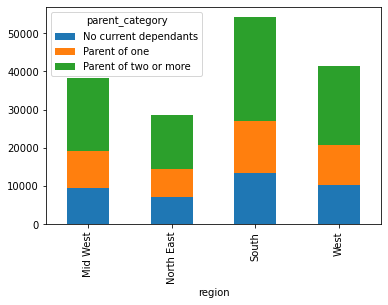

In [85]:
# Parent_category barchart, stacked of visual representation of customer base size difference
parent_category_region = region_parent.plot.bar(stacked = True)

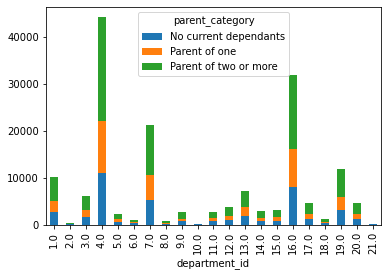

In [86]:
# Parent_category barchart, stacked of visual representation of customer base size difference
parent_category_department = department_parent.plot.bar(stacked = True)

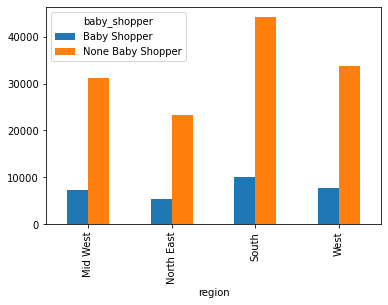

In [87]:
# Baby Shopper bar chart, side by side for immediate comparison between the two groups
baby_shopper_region = region_baby.plot.bar()

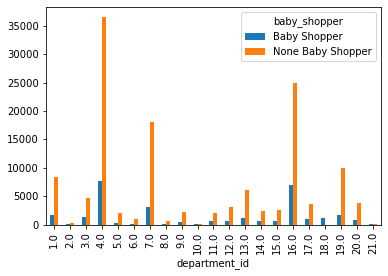

In [88]:
# Baby Shopper bar chart, side by side for immediate comparison between the two groups
baby_shopper_department = department_baby.plot.bar()

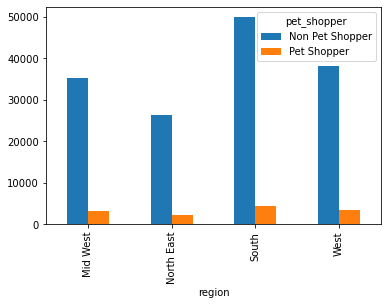

In [89]:
# Pet Shopper bar chart, side by side for immediate comparison between the two groups
pet_shopper_region = region_pet.plot.bar()

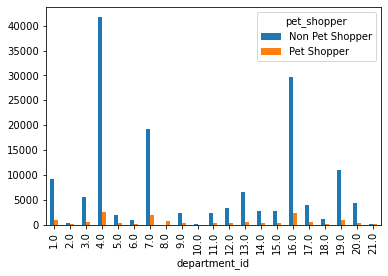

In [90]:
# Pet Shopper bar chart, side by side for immediate comparison between the two groups
pet_shopper_department = department_pet.plot.bar()

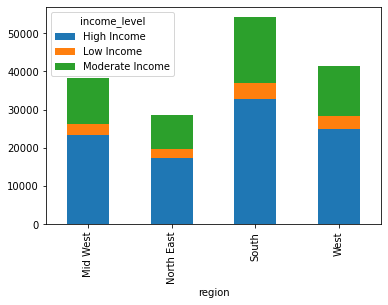

In [91]:
# Income Level barchart, stacked of visual representation of customer base size difference
income_level_region = region_income.plot.bar(stacked = True)

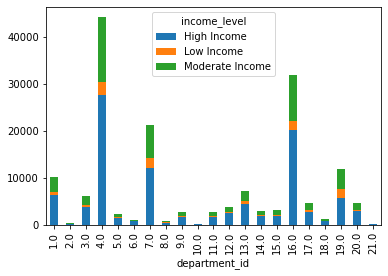

In [92]:
# Income Level barchart, stacked of visual representation of customer base size difference
income_level_department = department_income.plot.bar(stacked = True)

## 11. Exporting

In [93]:
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','final_merge.pkl'))

In [94]:
parent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_barchat.png'))
baby_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_shopper_barchart.png'))
pet_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_shopper_barchart.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_level_barchart.png'))

In [95]:
parent_category_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_category_region.png'))
parent_category_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_category_department.png'))
baby_shopper_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_shopper_region.png'))
baby_shopper_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_shopper_department.png'))
pet_shopper_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_shopper_region.png'))
pet_shopper_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_shopper_department.png'))
income_level_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_level_region.png'))
income_level_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_level_department.png'))